# Assignment 2 code

In [1]:
import matplotlib
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import time
import scipy as sp
from scipy import ndimage
from tqdm import tqdm
from scipy import optimize
from scipy import stats
from scipy.stats import multivariate_normal

font = {'fontname': 'serif'}

## Task (a): Exploring the data 


In [2]:
#Parameters
cutoff = 43

#Open STAI-Y2 score file
StaiScores = pd.read_csv("stai_scores.csv", header = None, index_col = None)

#Print mean, std and median
print("The mean STAI-Y2 score is: " + str(np.mean(StaiScores).to_string(index = False)))
print("The standard deviation of the STAI-Y2 scores is: " + str(np.std(StaiScores).to_string(index = False)))
print("The median of the STAI-Y2 scores is: " + str(np.median(StaiScores)))


#Classify patients
healthy_index = []
for i in range(len(StaiScores)):
    if float(StaiScores.loc[i].to_string(index = False)) <= 43:
        healthy_index.append(i)
        
print("The patients classified as healthy controls are the following ones: " + str(healthy_index + np.ones(len(healthy_index))))

The mean STAI-Y2 score is: 45.42
The standard deviation of the STAI-Y2 scores is: 15.92368
The median of the STAI-Y2 scores is: 42.5
The patients classified as healthy controls are the following ones: [22. 26. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43.
 44. 45. 46. 47. 48. 49. 50.]


In [3]:
choices = pd.read_csv("inst_choices.csv", header = None, index_col = None)
outcomes = pd.read_csv("inst_outcomes.csv", header = None, index_col = None)
#Number of times each participant choose option A
NumAopt = np.empty(len(StaiScores)) 

for i in range(len(StaiScores)):
    NumAopt[i] = len(np.where(choices.loc[i] == 1)[0])

print("Number of times each participant choose option A: " + str(NumAopt))

print("Average percentage of number of times option A is chosen: " + str((np.sum(NumAopt)/50)*(100/160)))


Number of times each participant choose option A: [29. 40. 55. 15. 46. 36. 55. 39. 30. 33. 44. 27. 27. 32. 43. 39. 15. 23.
 48. 48. 28. 41. 39. 24. 61. 33. 48. 47. 38. 22. 66. 40. 34. 46. 35. 51.
 37. 33. 65. 50. 29. 26. 34. 55. 23. 58. 27. 28. 41. 22.]
Average percentage of number of times option A is chosen: 23.8125


## Task (b): Simulations

In [4]:
#Simulation Parameters
trials = 160
N = 10000

#Simulation function of Model 1
def model_simulate(alpha, beta, V_0):  
    
    c = np.zeros(trials)
    o = np.zeros(trials)
    V_a = np.zeros(trials)
    V_b = np.zeros(trials)
    
    #Initial conditions
    V_a[0] = V_0
    V_b[0] = V_0
    
    #First 40 trial set
    for t in range(0,40):
        
        #Probability of choosing A
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        #If A is chosen
        if np.random.rand() < p_choose_A:
            
            c[t] = 1 
            
            #Will give aversive outcome with p = 0.6
            if np.random.rand() < 0.6:
                
                o[t] = 1
            
            #Update V_a but not V_b
            V_a[t+1] =  np.copy(V_a[t] + alpha*(o[t] - V_a[t]))
            V_b[t+1] =  np.copy(V_b[t]) 
        
        #If B is chosen
        else:
            
            c[t] = 2
            
            #Will give aversive outcome with p = 0.4
            if np.random.rand() < 0.4:
                
                o[t] = 1
        
            #Update V_b but not V_a
            V_a[t+1] =  np.copy(V_a[t]) 
            V_b[t+1] =  np.copy(V_b[t] + alpha*(o[t] - V_b[t]))
                
    #Second 40 trial set
    for t in range(40,80):
        
        #Probability of choosing A
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.8:
            
                o[t] = 1
            
            V_a[t+1] =  np.copy(V_a[t] + alpha*(o[t] - V_a[t]))
            V_b[t+1] =  np.copy(V_b[t]) 
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.2:
                
                o[t] = 1
        
            V_a[t+1] =  np.copy(V_a[t]) 
            V_b[t+1] =  np.copy(V_b[t] + alpha*(o[t] - V_b[t]))
                
    #Third 40 trial set        
    for t in range(80,120):
        
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.6:
                
                o[t] = 1
            
            V_a[t+1] =  np.copy(V_a[t] + alpha*(o[t] - V_a[t]))
            V_b[t+1] =  np.copy(V_b[t])
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.4:
            
                o[t] = 1
        
            V_a[t+1] =  np.copy(V_a[t]) 
            V_b[t+1] =  np.copy(V_b[t] + alpha*(o[t] - V_b[t]))     
    
    #Fourth 40 trial set         
    for t in range(120,159):
        
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.65:
                
                o[t] = 1
            
            V_a[t+1] =  np.copy(V_a[t] + alpha*(o[t] - V_a[t]))
            V_b[t+1] =  np.copy(V_b[t])
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.35:
                
                o[t] = 1

            V_a[t+1] =  np.copy(V_a[t]) 
            V_b[t+1] =  np.copy(V_b[t] + alpha*(o[t] - V_b[t]))     
    
    #Last trial
    p_choose_A = 1/(1 + np.exp(beta*(V_a[159]-V_b[159])))
    
    if np.random.rand() < p_choose_A:
            
        c[159] = 1
            
        if np.random.rand() < 0.65:
                
            o[159] = 1
    else:
            
        c[159] = 2
            
        if np.random.rand() < 0.35:
                
            o[159] = 1
    
    return c, o, V_a, V_b

choices_vals = np.zeros((N,trials))
o_vals = np.zeros((N,trials))
V_a_vals = np.zeros((N,trials))
V_b_vals = np.zeros((N,trials))
V_a_minus_V_b_vals = np.zeros((N,trials))


for n in tqdm(range(N)):
    
    choices_vals[n,:] , o_vals[n,:] , V_a_vals[n,:] , V_b_vals[n,:] = model_simulate(0.3,8,0.5)
    
    V_a_minus_V_b_vals[n,:] = V_a_vals[n,:] - V_b_vals[n,:]
    
choices_average = np.average(choices_vals,axis=0)
o_average = np.average(np.sum(o_vals,axis=1)) #np.average(o_vals,axis=0)
V_a_average = np.average(V_a_vals,axis=0)
V_b_average = np.average(V_b_vals,axis=0) 
V_a_minus_V_b_average = np.average(V_a_minus_V_b_vals,axis=0)    

print("The average number of aversive sounds is: " + str(o_average))#str(np.sum(o_average)))

100%|██████████| 10000/10000 [00:11<00:00, 877.41it/s]


The average number of aversive sounds is: 60.8977


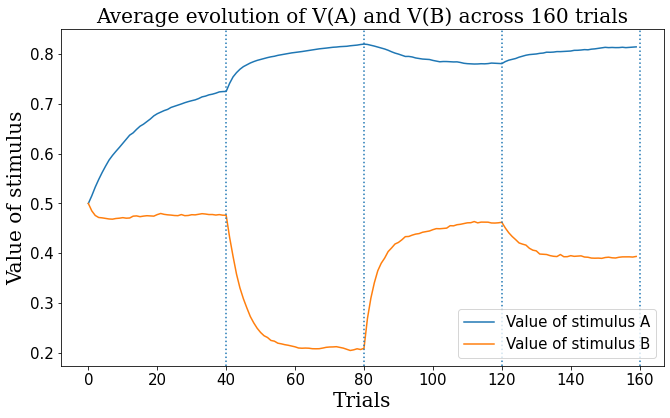

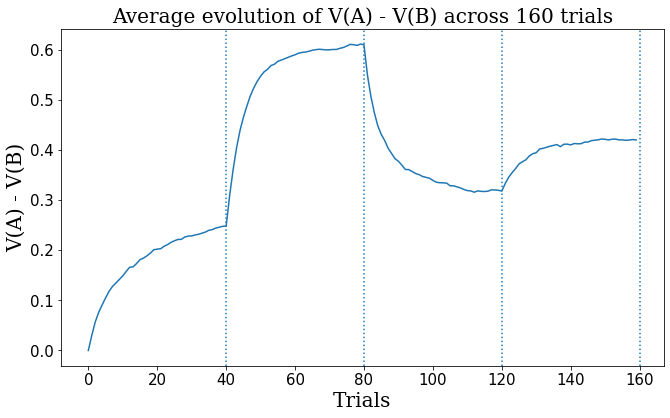

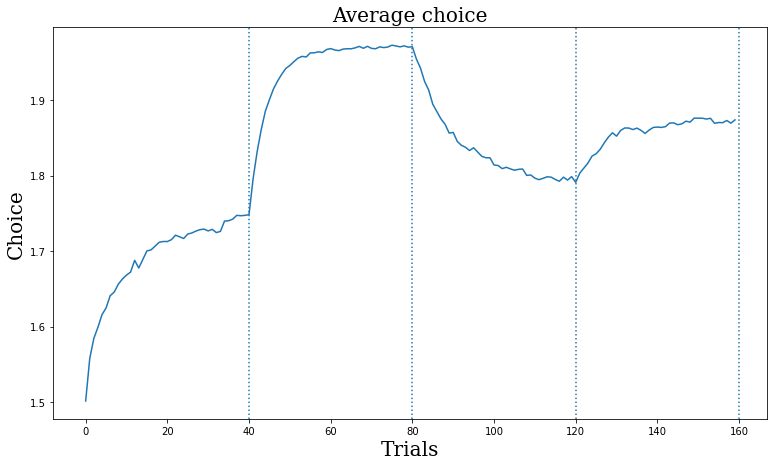

In [5]:
#Plotting

f1,ax = plt.subplots(figsize=(10.8, 6.2));
ax.plot(np.arange(trials),V_a_average,label = 'Value of stimulus A')
ax.plot(np.arange(trials),V_b_average,label = 'Value of stimulus B')
ax.axvline(x=40,linestyle = ':')
ax.axvline(x=80,linestyle = ':')
ax.axvline(x=120,linestyle = ':')
ax.axvline(x=160,linestyle = ':')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15,loc = 'lower right')
plt.title("Average evolution of V(A) and V(B) across 160 trials",fontsize=20,**font)
plt.xlabel("Trials",fontsize=20,**font)
plt.ylabel("Value of stimulus",fontsize=20,**font)
plt.show()

f2,ax = plt.subplots(figsize=(10.8, 6.2));
ax.plot(np.arange(trials),V_a_minus_V_b_average)
ax.axvline(x=40,linestyle = ':')
ax.axvline(x=80,linestyle = ':')
ax.axvline(x=120,linestyle = ':')
ax.axvline(x=160,linestyle = ':')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.title("Average evolution of V(A) - V(B) across 160 trials",fontsize=20,**font)
plt.xlabel("Trials",fontsize=20,**font)
plt.ylabel("V(A) - V(B)",fontsize=20,**font)
plt.show()


f3,ax = plt.subplots(figsize=(12.8, 7.2));
ax.plot(np.arange(trials),choices_average)
ax.axvline(x=40,linestyle = ':')
ax.axvline(x=80,linestyle = ':')
ax.axvline(x=120,linestyle = ':')
ax.axvline(x=160,linestyle = ':')
plt.title("Average choice",fontsize=20,**font)
plt.xlabel("Trials",fontsize=20,**font)
plt.ylabel("Choice",fontsize=20,**font)
plt.show()


## Task (c): Exploring parameter settings

In [6]:
N = 1000

alphas_hm = np.linspace(0.01,1,30,endpoint=False)
betas_hm = np.linspace(0.01,15,30)

choices_vals_hm = np.zeros((N,trials))
o_vals_hm = np.zeros((N,trials))
V_a_vals_hm = np.zeros((N,trials))
V_b_vals_hm = np.zeros((N,trials))

o_heatmap = np.zeros((len(alphas_hm),len(betas_hm)))

for a in tqdm(range(len(alphas_hm))):
    for b in range(len(betas_hm)):
        for n in range(N):
    
            choices_vals_hm[n,:] , o_vals_hm[n,:] , V_a_vals_hm[n,:] , V_b_vals_hm[n,:] = model_simulate(alphas_hm[a],betas_hm[b],0.5)
       
        o_heatmap[b,a] = np.average(np.sum(o_vals_hm,axis = 1)) 

100%|██████████| 30/30 [16:27<00:00, 32.92s/it]


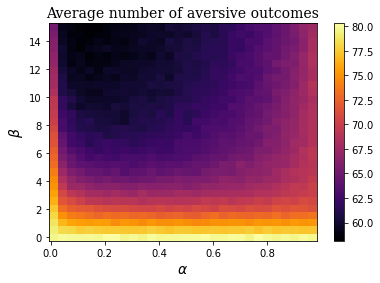

In [7]:
#Plot Heat Map of average number of aversive stimuli received
plt.pcolormesh(alphas_hm,betas_hm,o_heatmap,cmap="inferno")
plt.title("Average number of aversive outcomes",fontsize=14,**font)
plt.xlabel(r'$\alpha$',fontsize=14,**font);
plt.ylabel(r'$\beta$',fontsize=14,**font); 
plt.colorbar()

## Task (d): Likelihood function

In [8]:
def model_neg_log_likelihood(theta,p,choices,outcomes,V_0):
    
    alpha = theta[0]
    beta = theta[1]
    
    V = np.array([V_0,V_0])

    choice_probabilities = np.zeros(trials)
    
    for t in range(trials):
        
        c = choices.loc[p,t]
        o = outcomes.loc[p,t]
        
        if c == 1:
            
            c_alt = 2
        
        else:
            
            c_alt = 1
        
        choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
        
        V[c-1] = np.copy(V[c-1]+ alpha*(o - V[c-1]))
        
    return -np.sum(np.log(choice_probabilities))
    

In [9]:
#Check NLL function with second participant
theta = np.array([0.3,8])
print("NLL for the second participant is: " + str(model_neg_log_likelihood(theta,1,choices,outcomes,0.5)))

NLL for the second participant is: 64.24159844691494


In [10]:
#NLL for the first and 10th participant using given parameters.
print("NLL for the first participant is: " + str(model_neg_log_likelihood(theta,0,choices,outcomes,0.5)))
print("NLL for the 10th participant is: " + str(model_neg_log_likelihood(theta,9,choices,outcomes,0.5)))

NLL for the first participant is: 50.19065076029976
NLL for the 10th participant is: 58.602608072173666


## Task (e): Model fitting

In [11]:
#Find optimized values
optimized_alphas = np.zeros(50)
optimized_betas = np.zeros(50)

theta_guess = np.array([0.3,8])

for i in tqdm(range(50)):
    optimized_params = sp.optimize.minimize(model_neg_log_likelihood, theta_guess, args=(i,choices, outcomes,0.5), method='Nelder-Mead').x
    optimized_alphas[i] = optimized_params[0]
    optimized_betas[i] = optimized_params[1] 
    
mean_optimized_alphas = np.average(optimized_alphas)
var_optimized_alphas = np.std(optimized_alphas)**2
mean_optimized_betas = np.average(optimized_betas)
var_optimized_betas = np.std(optimized_betas)**2

print("The mean of the fitted alpha is: " + str(mean_optimized_alphas))
print("The variance of the fitted alpha is: " + str(var_optimized_alphas))
print("The mean of the fitted beta is: " + str(mean_optimized_betas))
print("The variance of the fitted beta is: " + str(var_optimized_betas))

100%|██████████| 50/50 [00:12<00:00,  3.91it/s]

The mean of the fitted alpha is: 0.42374345533863056
The variance of the fitted alpha is: 0.014278285594727625
The mean of the fitted beta is: 5.2789636097567465
The variance of the fitted beta is: 3.0381890388988757


In [12]:
#Find nll values for each participant for model 1
nll_model1 = np.zeros(50)
for i in range(50):
    theta_nll1 = np.array([optimized_alphas[i],optimized_betas[i]])
    nll_model1[i] = model_neg_log_likelihood(theta_nll1,i,choices, outcomes,0.5)
print(nll_model1)

[47.75940023 54.91954282 34.59878631 27.74201802 56.98302465 57.05618112
 45.11195183 54.81692477 49.62291447 47.85597346 47.56697524 34.73100298
 44.5429264  50.79311437 62.4647707  54.72651213 30.8777312  31.10233063
 66.41251742 45.91596442 56.65855605 47.46280706 63.65265147 40.22606036
 97.30860193 67.91003084 63.09078768 88.13828263 74.39358922 54.77487413
 55.45645263 70.11715787 73.23142126 68.70085192 78.63913526 83.57885404
 59.01812645 52.3950467  98.90208895 87.56975594 56.76813896 61.83659952
 62.4290714  84.3365027  38.99229342 82.72018845 59.85036959 32.57472408
 83.25344974 45.63032546]


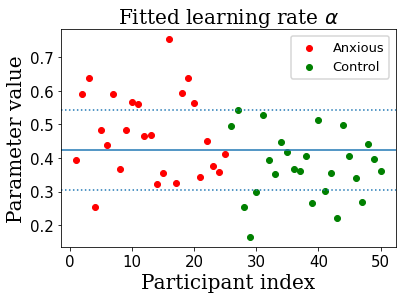

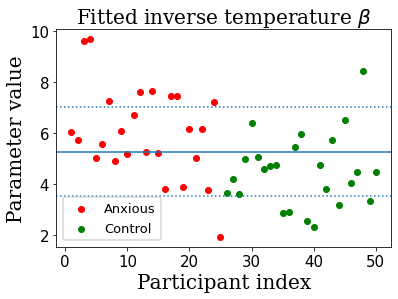

In [13]:
#Plot Model fitting

plt.scatter(np.linspace(1,25,25),optimized_alphas[:25], color = 'red', label = "Anxious")
plt.scatter(np.linspace(26,50,25),optimized_alphas[25:], color = 'green',label = "Control")
plt.title("Fitted learning rate " r'$\alpha$',fontsize=20,**font)
plt.xlabel("Participant index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = 0.4237 + np.sqrt(0.0143),linestyle = ':')
plt.axhline(y = 0.4237,linestyle = '-')
plt.axhline(y = 0.4237 - np.sqrt(0.0143),linestyle = ':')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=13,loc = 'upper right').get_frame().set_linewidth(1.5)
plt.show()

plt.scatter(np.linspace(1,25,25),optimized_betas[:25], color = 'red',label = "Anxious")
plt.scatter(np.linspace(26,50,25),optimized_betas[25:], color = 'green',label = "Control")
plt.title("Fitted inverse temperature " r'$\beta$',fontsize=20,**font)
plt.xlabel("Participant index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = 5.2790 + np.sqrt(3.0382),linestyle = ':')
plt.axhline(y = 5.2790,linestyle = '-')
plt.axhline(y = 5.2790 - np.sqrt(3.0382),linestyle = ':')
plt.legend(fontsize=13).get_frame().set_linewidth(1.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [14]:
#Calculate Pearson´s correlation coefficient between estimated parameters across all participants

pearsons_corr_all, p_val_all = sp.stats.pearsonr(optimized_alphas, optimized_betas)

print("The Pearson´s correlation coefficient between estimated parameters across all participants is: " + str(pearsons_corr_all))

The Pearson´s correlation coefficient between estimated parameters across all participants is: 0.07219200521010426


In [15]:
#Calculate Pearson´s correlation coefficient between estimated parameters for participants within each group

pearsons_corr_control, p_val_control = sp.stats.pearsonr(optimized_alphas[25:], optimized_betas[25:])
pearsons_corr_anxious, p_val_anxious = sp.stats.pearsonr(optimized_alphas[:25], optimized_betas[:25])


print("The Pearson´s correlation coefficient between estimated parameters for the control group is: " + str(pearsons_corr_control))
print("The Pearson´s correlation coefficient between estimated parameters for the high anxious group is: " + str(pearsons_corr_anxious))

The Pearson´s correlation coefficient between estimated parameters for the control group is: -0.10274632925287824
The Pearson´s correlation coefficient between estimated parameters for the high anxious group is: -0.13327926387630962


## Task (f): Group comparison

In [16]:
#Check if variances are similar
print("The variance of optimized alphas for anxious group is: " + str(np.var(optimized_alphas[24:])))
print("The variance of optimized alphas for control group is: " + str(np.var(optimized_alphas[:24])))
print("The variance of optimized betas for anxious group is: " + str(np.var(optimized_betas[24:])))
print("The variance of optimized betas for control group is: " + str(np.var(optimized_betas[:24])))

# Welsch t-test
print(stats.ttest_ind(optimized_alphas[:25],optimized_alphas[25:] , equal_var=False))
print(stats.ttest_ind(optimized_betas[:25],optimized_betas[25:] , equal_var=False))

The variance of optimized alphas for anxious group is: 0.008999820068125988
The variance of optimized alphas for control group is: 0.015108006780675053
The variance of optimized betas for anxious group is: 2.0866320446041646
The variance of optimized betas for control group is: 2.439743557475143
Ttest_indResult(statistic=3.033285774110115, pvalue=0.003978909213480201)
Ttest_indResult(statistic=3.303459937159372, pvalue=0.0018626518919232415)


## Task (g): Parameter recovery

In [45]:
#Use suggested variance, covariances are set to 0
cov = np.array([[0.01,0],[0,0.5]])
#For mean, use mean of the fitted parameter values obtained in task e
mean_fitted = np.array([0.4237,5.2790])
#Draw sampled parameters
sampled_parameters = np.random.multivariate_normal(mean_fitted,cov,50)

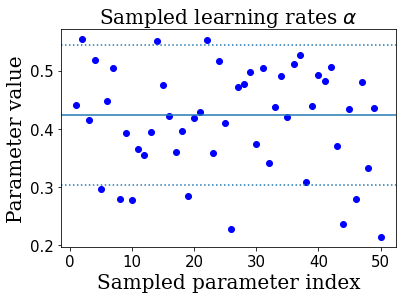

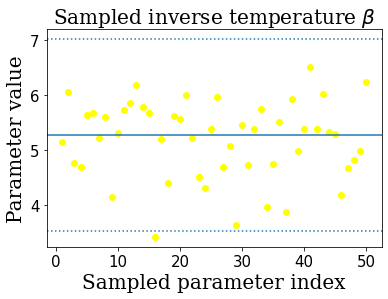

In [46]:
#Plot sampled parameters
plt.scatter(np.linspace(1,50,50),sampled_parameters[:,0], color = 'blue')
plt.title("Sampled learning rates " r'$\alpha$',fontsize=20,**font)
plt.xlabel("Sampled parameter index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = 0.4237 + np.sqrt(0.0143),linestyle = ':')
plt.axhline(y = 0.4237,linestyle = '-')
plt.axhline(y = 0.4237 - np.sqrt(0.0143),linestyle = ':')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

plt.scatter(np.linspace(1,50,50),sampled_parameters[:,1], color = 'yellow')
plt.title("Sampled inverse temperature " r'$\beta$',fontsize=20,**font)
plt.xlabel("Sampled parameter index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = 5.2790 + np.sqrt(3.0382),linestyle = ':')
plt.axhline(y = 5.2790,linestyle = '-')
plt.axhline(y = 5.2790 - np.sqrt(3.0382),linestyle = ':')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

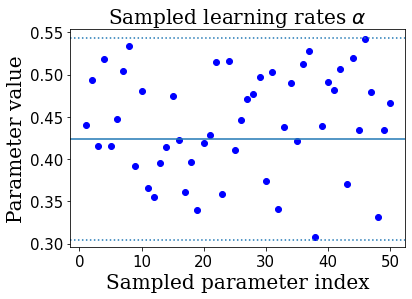

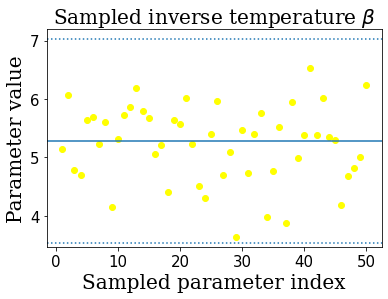

In [47]:
#Identify nonsensical values and resamples.
for i in range (len(sampled_parameters[:,0])):
    if sampled_parameters[i,0] > (0.4237 + np.sqrt(0.0143)) or sampled_parameters[i,0] < (0.4237 - np.sqrt(0.0143)):
        
        new_samp = np.random.multivariate_normal(mean_fitted,cov)[0]
        while new_samp >  (0.4237 + np.sqrt(0.0143)) or new_samp < (0.4237 - np.sqrt(0.0143)):
            new_samp = np.random.multivariate_normal(mean_fitted,cov)[0]
        sampled_parameters[i,0] = new_samp

for i in range (len(sampled_parameters[:,1])):
    if sampled_parameters[i,1] > (5.2790 + np.sqrt(3.0382)) or sampled_parameters[i,1] < (5.2790 - np.sqrt(3.0382)):
        
        new_samp = np.random.multivariate_normal(mean_fitted,cov)[1]
        while new_samp >  (5.2790 + np.sqrt(3.0382)) or new_samp < (5.2790 - np.sqrt(3.0382)):
            new_samp = np.random.multivariate_normal(mean_fitted,cov)[1]
        sampled_parameters[i,1] = new_samp

#Plotting samples parameters after identifying outliers and resampling
plt.scatter(np.linspace(1,50,50),sampled_parameters[:,0], color = 'blue')
plt.title("Sampled learning rates " r'$\alpha$',fontsize=20,**font)
plt.xlabel("Sampled parameter index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = 0.4237 + np.sqrt(0.0143),linestyle = ':')
plt.axhline(y = 0.4237,linestyle = '-')
plt.axhline(y = 0.4237 - np.sqrt(0.0143),linestyle = ':')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

plt.scatter(np.linspace(1,50,50),sampled_parameters[:,1], color = 'yellow')
plt.title("Sampled inverse temperature " r'$\beta$',fontsize=20,**font)
plt.xlabel("Sampled parameter index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = 5.2790 + np.sqrt(3.0382),linestyle = ':')
plt.axhline(y = 5.2790,linestyle = '-')
plt.axhline(y = 5.2790 - np.sqrt(3.0382),linestyle = ':')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
#Used Sampled values to simulate 50 sets of data

simulated_choices = np.zeros((50,160))
simulated_outcomes = np.zeros((50,160))
simulated_V_a = np.zeros((50,160))
simulated_V_b = np.zeros((50,160))

for i in tqdm(range(50)):
    
   
    simulated_choices[i,:] , simulated_outcomes[i,:] , simulated_V_a[i,:] ,simulated_V_b[i,:] = model_simulate(sampled_parameters[i,0], sampled_parameters[i,1], 0.5)
    


100%|██████████| 50/50 [00:00<00:00, 906.70it/s]


In [49]:
#Fit parameter values to simulated data sets

def model_neg_log_likelihood_taskg(theta,choices,outcomes,V_0,trials):
    
    alpha = theta[0]
    beta = theta[1]
    
    V = np.array([V_0,V_0])

    choice_probabilities = np.zeros(trials)
    
    for t in range(trials):
        
        c = int(choices[t])
        o = outcomes[t]
        
        if c == 1:
            
            c_alt = 2
        
        else:
            
            c_alt = 1
        
        choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
        
        V[c-1] = np.copy(V[c-1]+ alpha*(o - V[c-1]))
        
    return -np.sum(np.log(choice_probabilities))



optimized_alphas_taskg = np.zeros(50)
optimized_betas_taskg = np.zeros(50)

#set starting parameters
theta_guess = np.array([0.3,8])

for i in tqdm(range(50)):
    optimized_alphas_taskg[i] = sp.optimize.minimize(model_neg_log_likelihood_taskg, theta_guess, args=(simulated_choices[i,:], simulated_outcomes[i,:] ,0.5,160), method='Nelder-Mead').x[0]
    optimized_betas_taskg[i] = sp.optimize.minimize(model_neg_log_likelihood_taskg, theta_guess, args=(simulated_choices[i,:], simulated_outcomes[i,:] ,0.5,160), method='Nelder-Mead').x[1]
 


100%|██████████| 50/50 [00:05<00:00,  9.31it/s]


In [50]:
#Calculate and illustrate Pearson´s correlation between parameter values used to simulate the data, and the parameter values obtained from fitting the model to the simulated data
pearsons_corr_sim_alpha , p_val_sim_alpha = sp.stats.pearsonr(sampled_parameters[:,0], optimized_alphas_taskg)
pearsons_corr_sim_beta , p_val_sim_beta = sp.stats.pearsonr(sampled_parameters[:,1], optimized_betas_taskg)

print(pearsons_corr_sim_alpha)
print(pearsons_corr_sim_beta)

0.6079995473899185
0.56036023224783


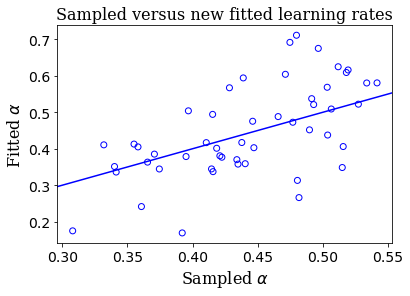

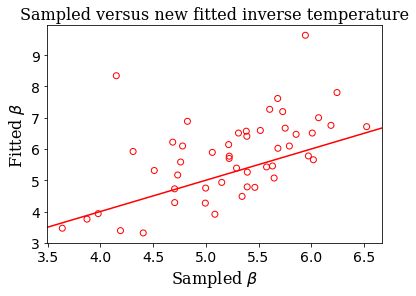

In [51]:
#Illustration Parameter Recovery

plt.scatter(sampled_parameters[:,0],optimized_alphas_taskg, color="none", edgecolor="blue")
plt.axline((0.45, 0.45), slope = 1, color='blue')
plt.title("Sampled versus new fitted learning rates",fontsize=16,**font)
plt.xlabel("Sampled " r'$\alpha$',fontsize=16,**font)
plt.ylabel("Fitted " r'$\alpha$',fontsize=16,**font)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

plt.scatter(sampled_parameters[:,1],optimized_betas_taskg, color="none", edgecolor="red")
plt.axline((5, 5), slope = 1, color='red')
plt.title("Sampled versus new fitted inverse temperature",fontsize=16,**font)
plt.xlabel("Sampled " r'$\beta$',fontsize=16,**font)
plt.ylabel("Fitted " r'$\beta$',fontsize=16,**font)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


In [24]:
#Repeat process 5 times

optimized_alphas_taskg = np.zeros((5,50))
optimized_betas_taskg = np.zeros((5,50))

pearsons_correlations_alphas =  np.zeros(5)
pearsons_correlations_betas =  np.zeros(5)

for j in tqdm(range(5)):
    
    sampled_parameters = np.random.multivariate_normal(mean_fitted,cov,50)
    
    for i in range (len(sampled_parameters[:,0])):
        if sampled_parameters[i,0] > (0.4237 + np.sqrt(0.0143)) or sampled_parameters[i,0] < (0.4237 - np.sqrt(0.0143)):
            new_samp = np.random.multivariate_normal(mean_fitted,cov)[0]
            while new_samp >  (0.4237 + np.sqrt(0.0143)) or new_samp < (0.4237 - np.sqrt(0.0143)):
                new_samp = np.random.multivariate_normal(mean_fitted,cov)[0]
            sampled_parameters[i,0] = new_samp

    for i in range (len(sampled_parameters[:,1])):
        if sampled_parameters[i,1] > (5.2790 + np.sqrt(3.0382)) or sampled_parameters[i,1] < (5.2790 - np.sqrt(3.0382)):

            new_samp = np.random.multivariate_normal(mean_fitted,cov)[1]
            while new_samp >  (5.2790 + np.sqrt(3.0382)) or new_samp < (5.2790 - np.sqrt(3.0382)):
                new_samp = np.random.multivariate_normal(mean_fitted,cov)[1]
            sampled_parameters[i,1] = new_samp
    
    
    for i in range(50):
        
        sim_cho = np.zeros(160)
        sim_out = np.zeros(160)
        sim_V_a = np.zeros(160)
        sim_V_b = np.zeros(160)
   
        theta_guess = np.array([0.3,8])
        
        sim_cho , sim_out, sim_V_a ,sim_V_b = model_simulate(sampled_parameters[i,0], sampled_parameters[i,1], 0.5)
        optimization = sp.optimize.minimize(model_neg_log_likelihood_taskg, theta_guess, args=(sim_cho, sim_out ,0.5,160), method='Nelder-Mead').x
        optimized_alphas_taskg[j,i] = optimization[0]
        optimized_betas_taskg[j,i] = optimization[1]
        

    pearsons_correlations_alphas[j] , p_val_alpha = sp.stats.pearsonr(sampled_parameters[:,0], optimized_alphas_taskg[j,:])
    
    pearsons_correlations_betas[j] , p_val_beta = sp.stats.pearsonr(sampled_parameters[:,1], optimized_betas_taskg[j,:])

print(pearsons_correlations_alphas)
print(pearsons_correlations_betas)
    

100%|██████████| 5/5 [00:13<00:00,  2.63s/it]

[0.5265266  0.64601317 0.61179113 0.6496717  0.29247156]
[0.59279444 0.60921686 0.5506945  0.52448613 0.48381727]


In [25]:
#Explore how number of trials and number of simulated data sets affects performance of the parameter recovery

trials_taskg = int(input("Number of trials: "))
sim_sets = int(input("Number of simulated data sets: "))

def model_simulate_taskg(alpha, beta, V_0):  
    
    c = np.zeros(trials_taskg)
    o = np.zeros(trials_taskg)
    V_a = np.zeros(trials_taskg)
    V_b = np.zeros(trials_taskg)
    
    #Initial conditions
    V_a[0] = V_0
    V_b[0] = V_0
    
    #First 40 trial set
    for t in range(0,int(trials_taskg/4)):
        
        #Probability of choosing A
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        #If A is chosen
        if np.random.rand() < p_choose_A:
            
            c[t] = 1 
            
            #Will give aversive outcome with p = 0.6
            if np.random.rand() < 0.6:
                
                o[t] = 1
            
            #Update V_a but not V_b
            V_a[t+1] =  np.copy(V_a[t] + alpha*(o[t] - V_a[t]))
            V_b[t+1] =  np.copy(V_b[t]) 
        
        #If B is chosen
        else:
            
            c[t] = 2
            
            #Will give aversive outcome with p = 0.4
            if np.random.rand() < 0.4:
                
                o[t] = 1
        
            #Update V_b but not V_a
            V_a[t+1] =  np.copy(V_a[t]) 
            V_b[t+1] =  np.copy(V_b[t] + alpha*(o[t] - V_b[t]))
                
    #Second 40 trial set
    for t in range(int(trials_taskg/4),int(trials_taskg/2)):
        
        #Probability of choosing A
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.8:
            
                o[t] = 1
            
            V_a[t+1] =  np.copy(V_a[t] + alpha*(o[t] - V_a[t]))
            V_b[t+1] =  np.copy(V_b[t]) 
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.2:
                
                o[t] = 1
        
            V_a[t+1] =  np.copy(V_a[t]) 
            V_b[t+1] =  np.copy(V_b[t] + alpha*(o[t] - V_b[t]))
                
    #Third 40 trial set        
    for t in range(int(trials_taskg/2),int((3*trials_taskg)/4)):
        
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.6:
                
                o[t] = 1
            
            V_a[t+1] =  np.copy(V_a[t] + alpha*(o[t] - V_a[t]))
            V_b[t+1] =  np.copy(V_b[t])
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.4:
            
                o[t] = 1
        
            V_a[t+1] =  np.copy(V_a[t]) 
            V_b[t+1] =  np.copy(V_b[t] + alpha*(o[t] - V_b[t]))     
    
    #Fourth 40 trial set         
    for t in range(int((3*trials_taskg)/4),trials_taskg-1):
        
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.65:
                
                o[t] = 1
            
            V_a[t+1] =  np.copy(V_a[t] + alpha*(o[t] - V_a[t]))
            V_b[t+1] =  np.copy(V_b[t])
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.35:
                
                o[t] = 1

            V_a[t+1] =  np.copy(V_a[t]) 
            V_b[t+1] =  np.copy(V_b[t] + alpha*(o[t] - V_b[t]))     
    
    #Last trial
    p_choose_A = 1/(1 + np.exp(beta*(V_a[trials_taskg-1]-V_b[trials_taskg-1])))
    
    if np.random.rand() < p_choose_A:
            
        c[trials_taskg-1] = 1
            
        if np.random.rand() < 0.65:
                
            o[trials_taskg-1] = 1
    else:
            
        c[trials_taskg-1] = 2
            
        if np.random.rand() < 0.35:
                
            o[trials_taskg-1] = 1
    
    return c, o, V_a, V_b



optimized_alphas_taskg = np.zeros((5,sim_sets))
optimized_betas_taskg = np.zeros((5,sim_sets))

pearsons_correlations_alphas =  np.zeros(5)
pearsons_correlations_betas =  np.zeros(5)

for j in tqdm(range(5)):
    
    sampled_parameters = np.random.multivariate_normal(mean_fitted,cov,sim_sets)
   
    for i in range (len(sampled_parameters[:,0])):
        if sampled_parameters[i,0] > (0.4237 + np.sqrt(0.0143)) or sampled_parameters[i,0] < (0.4237 - np.sqrt(0.0143)):
            new_samp = np.random.multivariate_normal(mean_fitted,cov)[0]
            while new_samp >  (0.4237 + np.sqrt(0.0143)) or new_samp < (0.4237 - np.sqrt(0.0143)):
                new_samp = np.random.multivariate_normal(mean_fitted,cov)[0]
            sampled_parameters[i,0] = new_samp

    for i in range (len(sampled_parameters[:,1])):
        if sampled_parameters[i,1] > (5.2790 + np.sqrt(3.0382)) or sampled_parameters[i,1] < (5.2790 - np.sqrt(3.0382)):

            new_samp = np.random.multivariate_normal(mean_fitted,cov)[1]
            while new_samp >  (5.2790 + np.sqrt(3.0382)) or new_samp < (5.2790 - np.sqrt(3.0382)):
                new_samp = np.random.multivariate_normal(mean_fitted,cov)[1]
            sampled_parameters[i,1] = new_samp
    
    
    simulated_choices = np.zeros((sim_sets,trials_taskg))
    simulated_outcomes = np.zeros((sim_sets,trials_taskg))
    simulated_V_a = np.zeros((sim_sets,trials_taskg))
    simulated_V_b = np.zeros((sim_sets,trials_taskg))

    for i in range(sim_sets):
        simulated_choices[i,:] , simulated_outcomes[i,:] , simulated_V_a[i,:] , simulated_V_b[i,:] = model_simulate_taskg(sampled_parameters[i,0], sampled_parameters[i,1], 0.5)
 
    #set starting parameters
    theta_guess = np.array([0.3,8])

    for i in range(sim_sets):
        optimized_alphas_taskg[j,i] = sp.optimize.minimize(model_neg_log_likelihood_taskg, theta_guess, args=(simulated_choices[i,:], simulated_outcomes[i,:] ,0.5,trials_taskg), method='Nelder-Mead').x[0]
        optimized_betas_taskg[j,i] = sp.optimize.minimize(model_neg_log_likelihood_taskg, theta_guess, args=(simulated_choices[i,:], simulated_outcomes[i,:] ,0.5,trials_taskg), method='Nelder-Mead').x[1]
   
    pearsons_correlations_alphas[j] , p_val_alpha = sp.stats.pearsonr(sampled_parameters[:,0], optimized_alphas_taskg[j,:])
    
    pearsons_correlations_betas[j] , p_val_beta = sp.stats.pearsonr(sampled_parameters[:,1], optimized_betas_taskg[j,:])

print(pearsons_correlations_alphas)
print(pearsons_correlations_betas)


Number of trials: 160
Number of simulated data sets: 100


100%|██████████| 5/5 [00:52<00:00, 10.46s/it]

[0.6419085  0.5197364  0.54053194 0.47097167 0.6177558 ]
[0.5869481  0.62171688 0.57918867 0.65350645 0.49418883]


## Task (h): Alternative model

In [26]:
#Simulation Parameters
trials = 160
N = 10000

#Simulation function of Model 1
def model2_simulate(alpha, beta, A,V_0):  
    
    c = np.zeros(trials)
    o = np.zeros(trials)
    V_a = np.zeros(trials)
    V_b = np.zeros(trials)
    
    #Initial conditions
    V_a[0] = V_0
    V_b[0] = V_0
    
    #First 40 trial set
    for t in range(0,40):
        
        #Probability of choosing A
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        #If A is chosen
        if np.random.rand() < p_choose_A:
            
            c[t] = 1 
            
            #Will give aversive outcome with p = 0.6
            if np.random.rand() < 0.6:
                
                o[t] = 1
            
            #Update V_a but not V_b
            V_a[t+1] =  A*V_a[t] + alpha*(o[t] - V_a[t])
            V_b[t+1] =  V_b[t] 
        
        #If B is chosen
        else:
            
            c[t] = 2
            
            #Will give aversive outcome with p = 0.4
            if np.random.rand() < 0.4:
                
                o[t] = 1
        
            #Update V_b but not V_a
            V_a[t+1] =  V_a[t] 
            V_b[t+1] =  A*V_b[t] + alpha*(o[t] - V_b[t])
                
    #Second 40 trial set
    for t in range(40,80):
        
        #Probability of choosing A
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.8:
            
                o[t] = 1
            
            V_a[t+1] =  A*V_a[t] + alpha*(o[t] - V_a[t])
            V_b[t+1] =  V_b[t] 
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.2:
                
                o[t] = 1
        
            V_a[t+1] =  V_a[t] 
            V_b[t+1] =  A*V_b[t] + alpha*(o[t] - V_b[t])
                
    #Third 40 trial set        
    for t in range(80,120):
        
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.6:
                
                o[t] = 1
            
            V_a[t+1] =  A*V_a[t] + alpha*(o[t] - V_a[t])
            V_b[t+1] =  V_b[t]
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.4:
            
                o[t] = 1
        
            V_a[t+1] =  V_a[t] 
            V_b[t+1] =  A*V_b[t] + alpha*(o[t] - V_b[t])       
    
    #Fourth 40 trial set         
    for t in range(120,159):
        
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.65:
                
                o[t] = 1
            
            V_a[t+1] =  A*V_a[t] + alpha*(o[t] - V_a[t])
            V_b[t+1] =  V_b[t]
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.35:
                
                o[t] = 1

            V_a[t+1] =  V_a[t] 
            V_b[t+1] =  A*V_b[t] + alpha*(o[t] - V_b[t])      
    
    #Last trial
    p_choose_A = 1/(1 + np.exp(beta*(V_a[159]-V_b[159])))
    
    if np.random.rand() < p_choose_A:
            
        c[159] = 1
            
        if np.random.rand() < 0.65:
                
            o[159] = 1
    else:
            
        c[159] = 2
            
        if np.random.rand() < 0.35:
                
            o[159] = 1
    
    return c, o, V_a, V_b


In [27]:
#Fit parameter values to simulated data sets

def model2_neg_log_likelihood(theta,choices,outcomes,V_0):
    
    alpha = theta[0]
    beta = theta[1]
    A = theta[2]
    
    V = np.array([V_0,V_0])

    choice_probabilities = np.zeros(trials)
    
    for t in range(trials):
        
        c = int(choices[t])
        o = outcomes[t]
        
        if c == 1:
            
            c_alt = 2
        
        else:
            
            c_alt = 1
        
        choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
        
        V[c-1] = np.copy(A*V[c-1]+ alpha*(o - V[c-1]))
        
    return -np.sum(np.log(choice_probabilities))

optimized_alphas_mod2 = np.zeros(50)
optimized_betas_mod2 = np.zeros(50)
optimized_As_mod2 = np.zeros(50)
nll_model2 = np.zeros(50) 

#set starting parameters
theta_guess_mod2 = np.array([0.4,5,0.5])

for i in tqdm(range(50)):
   
    optimized_taskh = sp.optimize.minimize(model2_neg_log_likelihood, theta_guess_mod2, args=(choices.loc[i,:], outcomes.loc[i,:] ,0.5), method='Nelder-Mead').x
    optimized_alphas_mod2[i] = optimized_taskh[0]
    optimized_betas_mod2[i] =  optimized_taskh[1]
    optimized_As_mod2[i] =  optimized_taskh[2]
    theta_nll_model2 = np.array([optimized_alphas_mod2[i],optimized_betas_mod2[i],optimized_As_mod2[i]])
    nll_model2[i] = model2_neg_log_likelihood(theta_nll_model2,choices.loc[i,:],outcomes.loc[i,:] ,0.5)

  6%|▌         | 3/50 [00:01<00:16,  2.94it/s]/tmp/ipykernel_73/907251431.py:26: RuntimeWarning: overflow encountered in exp
  choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
/tmp/ipykernel_73/907251431.py:30: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(choice_probabilities))
100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


In [28]:
#Calculate Pearson´s correlation coefficient between estimated parameters across all participants for model 2

pearsons_corr_alpha_beta_mod2, p_val_all = sp.stats.pearsonr(optimized_alphas_mod2, optimized_betas_mod2)

print("The Pearson´s correlation coefficient between alpha and beta across all participants for model 2 is: " + str(pearsons_corr_alpha_beta_mod2))

pearsons_corr_alpha_A_mod2, p_val_all = sp.stats.pearsonr(optimized_alphas_mod2, optimized_As_mod2)

print("The Pearson´s correlation coefficient between alpha and A across all participants for model 2 is: " + str(pearsons_corr_alpha_A_mod2))

pearsons_corr_beta_A_mod2, p_val_all = sp.stats.pearsonr(optimized_betas_mod2, optimized_As_mod2)

print("The Pearson´s correlation coefficient between beta and A across all participants for model 2 is: " + str(pearsons_corr_beta_A_mod2))

The Pearson´s correlation coefficient between alpha and beta across all participants for model 2 is: -0.6112565206491124
The Pearson´s correlation coefficient between alpha and A across all participants for model 2 is: 0.9999403636400976
The Pearson´s correlation coefficient between beta and A across all participants for model 2 is: -0.6120314688651913


In [29]:
print(np.mean(optimized_alphas_mod2))
print(np.std(optimized_alphas_mod2))

print(np.mean(optimized_betas_mod2))
print(np.std(optimized_betas_mod2))

print(np.mean(optimized_As_mod2))
print(np.std(optimized_As_mod2))

8.293316353023684
11.11035313220925
2.975843860244161
3.299383541292451
8.87831968447996
11.128049688913112


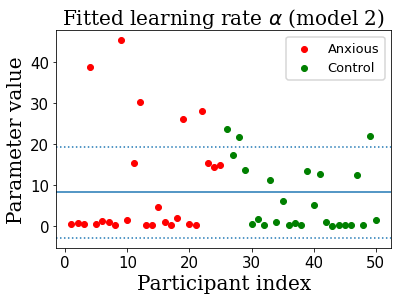

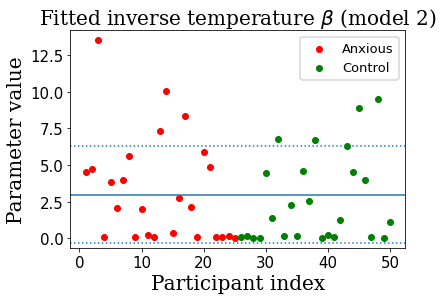

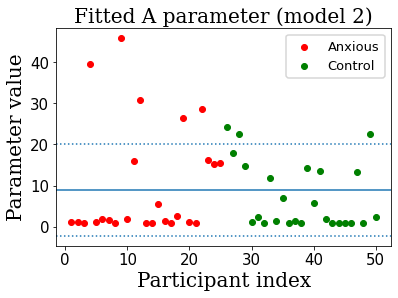

In [52]:
#Plot Model 2 fitting

plt.scatter(np.linspace(1,25,25),optimized_alphas_mod2[:25], color = 'red', label = "Anxious")
plt.scatter(np.linspace(26,50,25),optimized_alphas_mod2[25:], color = 'green',label = "Control")
plt.title("Fitted learning rate " r'$\alpha$'" (model 2)",fontsize=20,**font)
plt.xlabel("Participant index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = np.mean(optimized_alphas_mod2) + np.std(optimized_alphas_mod2),linestyle = ':')
plt.axhline(y = np.mean(optimized_alphas_mod2),linestyle = '-')
plt.axhline(y = np.mean(optimized_alphas_mod2) - np.std(optimized_alphas_mod2),linestyle = ':')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=13,loc = 'upper right').get_frame().set_linewidth(1.5)
plt.show()

plt.scatter(np.linspace(1,25,25),optimized_betas_mod2[:25], color = 'red',label = "Anxious")
plt.scatter(np.linspace(26,50,25),optimized_betas_mod2[25:], color = 'green',label = "Control")
plt.title("Fitted inverse temperature " r'$\beta$' " (model 2)",fontsize=20,**font)
plt.xlabel("Participant index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = np.mean(optimized_betas_mod2) + np.std(optimized_betas_mod2),linestyle = ':')
plt.axhline(y = np.mean(optimized_betas_mod2),linestyle = '-')
plt.axhline(y = np.mean(optimized_betas_mod2) - np.std(optimized_betas_mod2),linestyle = ':')
plt.legend(fontsize=13).get_frame().set_linewidth(1.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

plt.scatter(np.linspace(1,25,25),optimized_As_mod2[:25], color = 'red',label = "Anxious")
plt.scatter(np.linspace(26,50,25),optimized_As_mod2[25:], color = 'green',label = "Control")
plt.title("Fitted A parameter (model 2)",fontsize=20,**font)
plt.xlabel("Participant index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = np.mean(optimized_As_mod2) + np.std(optimized_As_mod2),linestyle = ':')
plt.axhline(y = np.mean(optimized_As_mod2),linestyle = '-')
plt.axhline(y = np.mean(optimized_As_mod2) - np.std(optimized_As_mod2),linestyle = ':')
plt.legend(fontsize=13).get_frame().set_linewidth(1.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

## Task (k): Discussion and extra model

In [31]:
#Simulation Parameters

N = 10000

#Simulation function of Model 3
def model3_simulate(theta_mod3,V_0):  
    
    alpha_p = theta_mod3[0]
    alpha_m = theta_mod3[1]
    beta = theta_mod3[2]
    
    
    c = np.zeros(trials)
    o = np.zeros(trials)
    V_a = np.zeros(trials)
    V_b = np.zeros(trials)
    
    #Initial conditions
    V_a[0] = V_0
    V_b[0] = V_0
    
    #First 40 trial set
    for t in range(0,40):
        
        #Probability of choosing A
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        #If A is chosen
        if np.random.rand() < p_choose_A:
            
            c[t] = 1 
            
            #Will give aversive outcome with p = 0.6
            if np.random.rand() < 0.6:
                
                o[t] = 1
            
            #Update V_a but not V_b
            V_a[t+1] =  V_a[t] + ((1-o[t])*alpha_p +o[t]*alpha_m)*(o[t] - V_a[t])
            V_b[t+1] =  V_b[t] 
        
        #If B is chosen
        else:
            
            c[t] = 2
            
            #Will give aversive outcome with p = 0.4
            if np.random.rand() < 0.4:
                
                o[t] = 1
        
            #Update V_b but not V_a
            V_a[t+1] =  V_a[t] 
            V_b[t+1] =  V_b[t] + ((1-o[t])*alpha_p +o[t]*alpha_m)*(o[t] - V_b[t])
                
    #Second 40 trial set
    for t in range(40,80):
        
        #Probability of choosing A
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.8:
            
                o[t] = 1
            
            V_a[t+1] =  V_a[t] + ((1-o[t])*alpha_p +o[t]*alpha_m)*(o[t] - V_a[t])
            V_b[t+1] =  V_b[t] 
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.2:
                
                o[t] = 1
        
            V_a[t+1] =  V_a[t] 
            V_b[t+1] =  V_b[t] + ((1-o[t])*alpha_p + o[t]*alpha_m)*(o[t] - V_b[t])
                
    #Third 40 trial set        
    for t in range(80,120):
        
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.6:
                
                o[t] = 1
            
            V_a[t+1] =  V_a[t] + ((1-o[t])*alpha_p + o[t]*alpha_m)*(o[t] - V_a[t])
            V_b[t+1] =  V_b[t]
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.4:
            
                o[t] = 1
        
            V_a[t+1] =  V_a[t] 
            V_b[t+1] =  V_b[t] + ((1-o[t])*alpha_p + o[t]*alpha_m)*(o[t] - V_b[t])  
    
    #Fourth 40 trial set         
    for t in range(120,159):
        
        p_choose_A = 1/(1 + np.exp(beta*(V_a[t]-V_b[t])))
        
        if np.random.rand() < p_choose_A:
            
            c[t] = 1
            
            if np.random.rand() < 0.65:
                
                o[t] = 1
            
            V_a[t+1] =  V_a[t] + ((1-o[t])*alpha_p + o[t]*alpha_m)*(o[t] - V_a[t]) 
            V_b[t+1] =  V_b[t]
            
        else:
            
            c[t] = 2
            
            if np.random.rand() < 0.35:
                
                o[t] = 1

            V_a[t+1] =  V_a[t] 
            V_b[t+1] =  V_b[t] + ((1-o[t])*alpha_p + o[t]*alpha_m)*(o[t] - V_b[t])
    
    #Last trial
    p_choose_A = 1/(1 + np.exp(beta*(V_a[159]-V_b[159])))
    
    if np.random.rand() < p_choose_A:
            
        c[159] = 1
            
        if np.random.rand() < 0.65:
                
            o[159] = 1
    else:
            
        c[159] = 2
            
        if np.random.rand() < 0.35:
                
            o[159] = 1
    
    return c, o, V_a, V_b


In [32]:
#Fit parameter values to simulated data sets for model 3

def model3_neg_log_likelihood(theta_mod3,choices,outcomes,V_0):
    
    alpha_p = theta_mod3[0]
    alpha_m = theta_mod3[1]
    beta = theta_mod3[2]
    
    V = np.array([V_0,V_0])

    choice_probabilities = np.zeros(trials)
    
    for t in range(trials):
        
        c = int(choices[t])
        o = outcomes[t]
        
        if c == 1:
            
            c_alt = 2
        
        else:
            
            c_alt = 1
        
        choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
        
        V[c-1] = np.copy(V[c-1]+ ((1-o)*alpha_p + o*alpha_m)*(o - V[c-1]))
        
    return -np.sum(np.log(choice_probabilities))

optimized_alphas_p_mod3 = np.zeros(50)
optimized_alphas_m_mod3 = np.zeros(50)
optimized_betas_mod3 = np.zeros(50)

nll_model3 = np.zeros(50) 

#set starting parameters
theta_guess_mod3 = np.array([0.25,0.35,6])

for i in tqdm(range(50)):
    optimizied_task_k = sp.optimize.minimize(model3_neg_log_likelihood, theta_guess_mod3, args=(choices.loc[i,:], outcomes.loc[i,:] ,0.5), method='Nelder-Mead').x
    optimized_alphas_p_mod3[i] = optimizied_task_k[0]
    optimized_alphas_m_mod3[i] = optimizied_task_k[1]
    optimized_betas_mod3[i] =  optimizied_task_k[2]
    theta_nll_model3 = np.array([optimized_alphas_p_mod3[i],optimized_alphas_m_mod3[i],optimized_betas_mod3[i]])
    nll_model3[i] = model3_neg_log_likelihood(theta_nll_model3,choices.loc[i,:],outcomes.loc[i,:] ,0.5)

100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


In [33]:
#Calculate Pearson´s correlation coefficient between estimated parameters across all participants for model 2

pearsons_corr_alpha_p_alpha_m_mod3, p_val_all = sp.stats.pearsonr(optimized_alphas_p_mod3, optimized_alphas_m_mod3)

print("The Pearson´s correlation coefficient between alpha plus and alpha minus across all participants for model 3 is: " + str(pearsons_corr_alpha_p_alpha_m_mod3))

pearsons_corr_alpha_p_betas_mod3, p_val_all = sp.stats.pearsonr(optimized_alphas_p_mod3, optimized_betas_mod3)

print("The Pearson´s correlation coefficient between alpha plus and beta across all participants for model 3 is: " + str(pearsons_corr_alpha_p_betas_mod3))

pearsons_corr_alpha_m_betas_mod3, p_val_all = sp.stats.pearsonr(optimized_alphas_m_mod3, optimized_betas_mod3)

print("The Pearson´s correlation coefficient between alpha m and beta across all participants for model 3 is: " + str(pearsons_corr_alpha_m_betas_mod3))

The Pearson´s correlation coefficient between alpha plus and alpha minus across all participants for model 3 is: 0.03321450980822904
The Pearson´s correlation coefficient between alpha plus and beta across all participants for model 3 is: -0.44054161906594685
The Pearson´s correlation coefficient between alpha m and beta across all participants for model 3 is: 0.3710066996746164


In [34]:
# Welsch t-test
print(stats.ttest_ind(optimized_alphas_p_mod3[:25],optimized_alphas_p_mod3[25:] , equal_var=False))
print(stats.ttest_ind(optimized_alphas_m_mod3[:25],optimized_alphas_m_mod3[25:] , equal_var=False))
print(stats.ttest_ind(optimized_betas_mod3[:25],optimized_betas_mod3[25:] , equal_var=False))

Ttest_indResult(statistic=0.9787552608936594, pvalue=0.332609865908139)
Ttest_indResult(statistic=2.836906778297149, pvalue=0.006653256862702414)
Ttest_indResult(statistic=1.7226035623246954, pvalue=0.09621603471084636)


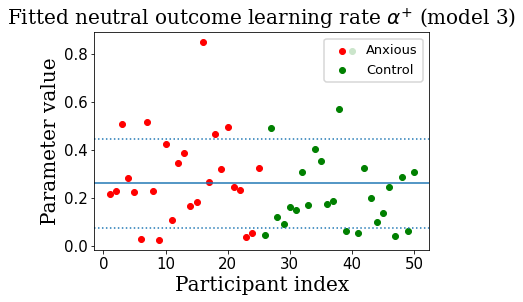

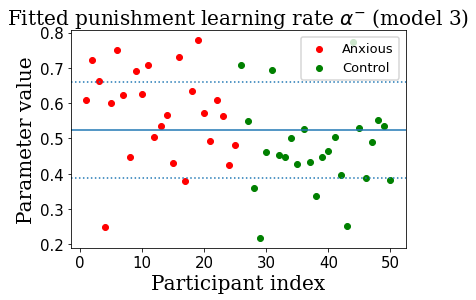

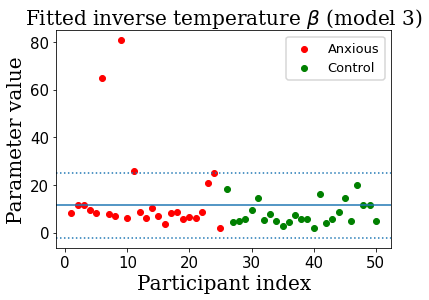

In [35]:
#Plot Model 3 fitting

plt.scatter(np.linspace(1,25,25),optimized_alphas_p_mod3[:25], color = 'red', label = "Anxious")
plt.scatter(np.linspace(26,50,25),optimized_alphas_p_mod3[25:], color = 'green',label = "Control")
plt.title("Fitted neutral outcome learning rate " r'$\alpha^{+}$'" (model 3)",fontsize=20,**font)
plt.xlabel("Participant index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = np.mean(optimized_alphas_p_mod3) + np.std(optimized_alphas_p_mod3),linestyle = ':')
plt.axhline(y = np.mean(optimized_alphas_p_mod3),linestyle = '-')
plt.axhline(y = np.mean(optimized_alphas_p_mod3) - np.std(optimized_alphas_p_mod3),linestyle = ':')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=13,loc = 'upper right').get_frame().set_linewidth(1.5)
plt.show()

plt.scatter(np.linspace(1,25,25),optimized_alphas_m_mod3[:25], color = 'red', label = "Anxious")
plt.scatter(np.linspace(26,50,25),optimized_alphas_m_mod3[25:], color = 'green',label = "Control")
plt.title("Fitted punishment learning rate " r'$\alpha^{-}$'" (model 3)",fontsize=20,**font)
plt.xlabel("Participant index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = np.mean(optimized_alphas_m_mod3) + np.std(optimized_alphas_m_mod3),linestyle = ':')
plt.axhline(y = np.mean(optimized_alphas_m_mod3),linestyle = '-')
plt.axhline(y = np.mean(optimized_alphas_m_mod3) - np.std(optimized_alphas_m_mod3),linestyle = ':')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=13,loc = 'upper right').get_frame().set_linewidth(1.5)
plt.show()

plt.scatter(np.linspace(1,25,25),optimized_betas_mod3[:25], color = 'red',label = "Anxious")
plt.scatter(np.linspace(26,50,25),optimized_betas_mod3[25:], color = 'green',label = "Control")
plt.title("Fitted inverse temperature " r'$\beta$' " (model 3)",fontsize=20,**font)
plt.xlabel("Participant index",fontsize=20,**font)
plt.ylabel("Parameter value",fontsize=20,**font)
plt.axhline(y = np.mean(optimized_betas_mod3) + np.std(optimized_betas_mod3),linestyle = ':')
plt.axhline(y = np.mean(optimized_betas_mod3),linestyle = '-')
plt.axhline(y = np.mean(optimized_betas_mod3) - np.std(optimized_betas_mod3),linestyle = ':')
plt.legend(fontsize=13).get_frame().set_linewidth(1.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()


## Task (i): Model comparison

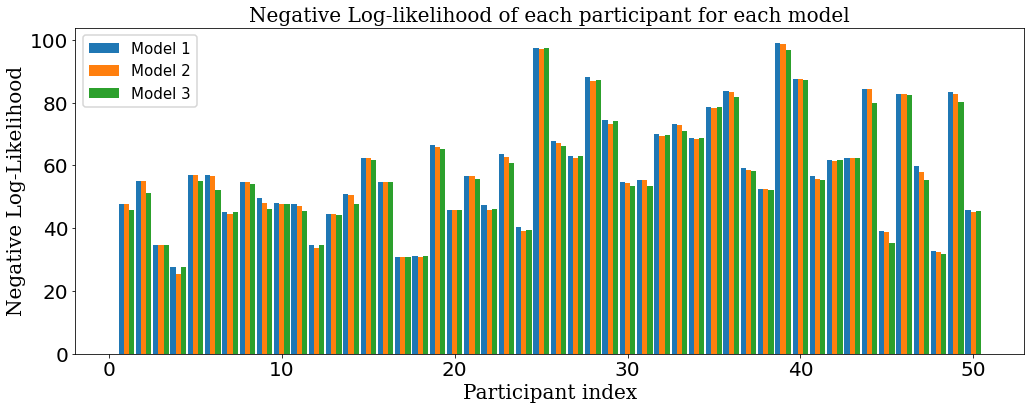

In [36]:
#Plot the NLL for each particiapant for the three models:

width = 0.3
fig, ax = plt.subplots(figsize = (17,6))
ax.bar(np.linspace(1,50,50)- width, nll_model1, width, label='Model 1')
ax.bar(np.linspace(1,50,50), nll_model2, width, label='Model 2')
ax.bar(np.linspace(1,50,50) + width, nll_model3, width, label='Model 3')
plt.title("Negative Log-likelihood of each participant for each model",fontsize=20,**font)
plt.xlabel("Participant index",fontsize=20,**font)
plt.ylabel("Negative Log-Likelihood",fontsize=20,**font)
plt.legend(fontsize=15).get_frame().set_linewidth(1.5)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


In [37]:
#Compute AIC and BIC scores for each model

AIC_mod1_part = np.zeros(50)
AIC_mod2_part = np.zeros(50)
AIC_mod3_part = np.zeros(50)

BIC_mod1_part = np.zeros(50)
BIC_mod2_part = np.zeros(50)
BIC_mod3_part = np.zeros(50)



for i in range(50):
    
    AIC_mod1_part[i] = 2*nll_model1[i] + 4 
    
    AIC_mod2_part[i] = 2*nll_model2[i] + 6
    
    AIC_mod3_part[i] = 2*nll_model3[i] + 6

    BIC_mod1_part[i] = 2*nll_model1[i] + 2*np.log(160) 
    
    BIC_mod2_part[i] = 2*nll_model2[i] + 3*np.log(160)
    
    BIC_mod3_part[i] = 2*nll_model3[i] + 3*np.log(160)

print("The AIC score for model 1 is: " + str(np.sum(AIC_mod1_part)))

print("The AIC score for model 2 is: " +str(np.sum(AIC_mod2_part)))

print("The AIC score for model 3 is: " +str(np.sum(AIC_mod3_part)))

print("The BIC score for model 1 is: " + str(np.sum(BIC_mod1_part)))

print("The BIC score for model 2 is: " +str(np.sum(BIC_mod2_part)))

print("The BIC score for model 3 is: " +str(np.sum(BIC_mod3_part)))

The AIC score for model 1 is: 6070.434717769935
The AIC score for model 2 is: 6123.361893245397
The AIC score for model 3 is: 6043.090488753161
The BIC score for model 1 is: 6377.952099293318
The BIC score for model 2 is: 6584.637965530471
The BIC score for model 3 is: 6504.366561038234


## Task (j): Model recovery and confusion matrix

In [38]:
def model1_neg_log_likelihood(theta,choices,outcomes,V_0):
    
    alpha = theta[0]
    beta = theta[1]
    
    V = np.array([V_0,V_0])

    choice_probabilities = np.zeros(trials)
    
    for t in range(trials):
        
        c = int(choices[t])
        o = outcomes[t]
        
        if c == 1:
            
            c_alt = 2
        
        else:
            
            c_alt = 1
        
        choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
        
        V[c-1] = np.copy(V[c-1]+ alpha*(o - V[c-1]))
        
    return -np.sum(np.log(choice_probabilities))

In [39]:
#Covariance matrix for each model
cov_mod1 = np.array([[0.01,0],[0,0.5]])
cov_mod2 = np.array([[0.01,0,0],[0,0.5,0],[0,0,0.01]])
cov_mod3 = np.array([[0.01,0,0],[0,0.01,0],[0,0,0.5]])

#Initial guess for each model (optimization)
theta_guess_mod1 = np.array([0.3,8])
theta_guess_mod2 = np.array([0.4,5,0.5])
theta_guess_mod3 = np.array([0.25,0.35,6])

In [40]:
#Sample parameters model 1
sampled_parameters_mod1 = np.random.multivariate_normal(mean_fitted,cov_mod1,100)

#resample outliers in model 1
for i in range (len(sampled_parameters_mod1[:,0])):
    if sampled_parameters_mod1[i,0] > (0.4237 + np.sqrt(0.0143)) or sampled_parameters_mod1[i,0] < (0.4237 - np.sqrt(0.0143)):
        new_samp = np.random.multivariate_normal(mean_fitted,cov_mod1)[0]
        while new_samp >  (0.4237 + np.sqrt(0.0143)) or new_samp < (0.4237 - np.sqrt(0.0143)):
            new_samp = np.random.multivariate_normal(mean_fitted,cov_mod1)[0]
        sampled_parameters_mod1[i,0] = new_samp

for i in range (len(sampled_parameters_mod1[:,1])):
    if sampled_parameters_mod1[i,1] > (5.2790 + np.sqrt(3.0382)) or sampled_parameters_mod1[i,1] < (5.2790 - np.sqrt(3.0382)):

        new_samp = np.random.multivariate_normal(mean_fitted,cov_mod1)[1]
        while new_samp >  (5.2790 + np.sqrt(3.0382)) or new_samp < (5.2790 - np.sqrt(3.0382)):
            new_samp = np.random.multivariate_normal(mean_fitted,cov_mod1)[1]
        sampled_parameters_mod1[i,1] = new_samp

AIC_winner_datamod1 = np.zeros(100)
BIC_winner_datamod1 = np.zeros(100)
        
for i in tqdm(range(100)):
    simulated_cho_mod1 , simulated_out_mod1 , simulated_V_a_mod1 , simulated_V_b_mod1 = model_simulate(sampled_parameters_mod1[i,0], sampled_parameters_mod1[i,1], 0.5)
    
    #fit models to simulated data
    optimized_datamod1_mod1 = sp.optimize.minimize(model1_neg_log_likelihood, theta_guess_mod1, args=(simulated_cho_mod1, simulated_out_mod1 ,0.5), method='Nelder-Mead').x
    optimized_datamod1_mod2 = sp.optimize.minimize(model2_neg_log_likelihood, theta_guess_mod2, args=(simulated_cho_mod1, simulated_out_mod1 ,0.5), method='Nelder-Mead').x
    optimized_datamod1_mod3 = sp.optimize.minimize(model3_neg_log_likelihood, theta_guess_mod3, args=(simulated_cho_mod1, simulated_out_mod1 ,0.5), method='Nelder-Mead').x
    
    #compute AIC and BIC scores for model 1
    theta_nll_datamod1_mod1 = np.array([optimized_datamod1_mod1[0],optimized_datamod1_mod1[1]])
    nll_datamod1_mod1 = model1_neg_log_likelihood(theta_nll_datamod1_mod1,simulated_cho_mod1,simulated_out_mod1 ,0.5)
    AIC_datamod1_mod1 = 2*nll_datamod1_mod1 + 4 
    BIC_datamod1_mod1 = 2*nll_datamod1_mod1 + 2*np.log(160)
    
    #compute AIC and BIC scores for model 2
    theta_nll_datamod1_mod2 = np.array([optimized_datamod1_mod2[0],optimized_datamod1_mod2[1],optimized_datamod1_mod2[2]])
    nll_datamod1_mod2 = model2_neg_log_likelihood(theta_nll_datamod1_mod2,simulated_cho_mod1,simulated_out_mod1 ,0.5)
    AIC_datamod1_mod2 = 2*nll_datamod1_mod2 + 6 
    BIC_datamod1_mod2 = 2*nll_datamod1_mod2 + 3*np.log(160)
    
    #compute AIC and BIC scores for model 3
    theta_nll_datamod1_mod3 = np.array([optimized_datamod1_mod3[0],optimized_datamod1_mod3[1],optimized_datamod1_mod3[2]])
    nll_datamod1_mod3 = model3_neg_log_likelihood(theta_nll_datamod1_mod3,simulated_cho_mod1,simulated_out_mod1 ,0.5)
    AIC_datamod1_mod3 = 2*nll_datamod1_mod3 + 6 
    BIC_datamod1_mod3 = 2*nll_datamod1_mod3 + 3*np.log(160)
    
    #Compare AICS:
    AICs_datamod1 = np.array([AIC_datamod1_mod1,AIC_datamod1_mod2,AIC_datamod1_mod3])
    AIC_winner_datamod1[i] =np.argmin(AICs_datamod1)
    
    #Compare BICS:
    BICs_datamod1 = np.array([BIC_datamod1_mod1,BIC_datamod1_mod2,BIC_datamod1_mod3])
    BIC_winner_datamod1[i] =np.argmin(BICs_datamod1)
    




 15%|█▌        | 15/100 [00:05<00:28,  2.99it/s]/tmp/ipykernel_73/907251431.py:26: RuntimeWarning: overflow encountered in exp
  choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
/tmp/ipykernel_73/907251431.py:30: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(choice_probabilities))
100%|██████████| 100/100 [00:39<00:00,  2.56it/s]


In [41]:
mean_fitted_mod2 = np.array([np.mean(optimized_alphas_mod2),np.mean(optimized_betas_mod2),np.mean(optimized_As_mod2)])
std_fitted_mod2 = np.array([np.std(optimized_alphas_mod2),np.std(optimized_betas_mod2),np.std(optimized_As_mod2)])


#Sample parameters model 2
sampled_parameters_mod2 = np.random.multivariate_normal(mean_fitted_mod2,cov_mod2,100)

#resample outliers in model 2
for i in range (len(sampled_parameters_mod2[:,0])):
    if sampled_parameters_mod2[i,0] > (mean_fitted_mod2[0] + std_fitted_mod2[0])  or sampled_parameters_mod2[i,0] < (mean_fitted_mod2[0] - std_fitted_mod2[0]):
        new_samp = np.random.multivariate_normal(mean_fitted_mod2,cov_mod2)[0]
        while new_samp >  (mean_fitted_mod2[0] + std_fitted_mod2[0]) or new_samp < (mean_fitted_mod2[0] - std_fitted_mod2[0]):
            new_samp = np.random.multivariate_normal(mean_fitted_mod2,cov_mod2)[0]
        sampled_parameters_mod2[i,0] = new_samp
        
for i in range (len(sampled_parameters_mod2[:,1])):
    if sampled_parameters_mod2[i,1] > (mean_fitted_mod2[1] + std_fitted_mod2[1])  or sampled_parameters_mod2[i,1] < (mean_fitted_mod2[1] - std_fitted_mod2[1]):
        new_samp = np.random.multivariate_normal(mean_fitted_mod2,cov_mod2)[1]
        while new_samp >  (mean_fitted_mod2[1] + std_fitted_mod2[1]) or new_samp < (mean_fitted_mod2[1] - std_fitted_mod2[1]):
            new_samp = np.random.multivariate_normal(mean_fitted_mod2,cov_mod2)[1]
        sampled_parameters_mod2[i,1] = new_samp

for i in range (len(sampled_parameters_mod2[:,2])):
    if sampled_parameters_mod2[i,2] > (mean_fitted_mod2[2] + std_fitted_mod2[2])  or sampled_parameters_mod2[i,2] < (mean_fitted_mod2[2] - std_fitted_mod2[2]):
        new_samp = np.random.multivariate_normal(mean_fitted_mod2,cov_mod2)[2]
        while new_samp >  (mean_fitted_mod2[2] + std_fitted_mod2[2]) or new_samp < (mean_fitted_mod2[2] - std_fitted_mod2[2]):
            new_samp = np.random.multivariate_normal(mean_fitted_mod2,cov_mod2)[2]
        sampled_parameters_mod2[i,2] = new_samp

AIC_winner_datamod2 = np.zeros(100)
BIC_winner_datamod2 = np.zeros(100)
        
for i in tqdm(range(100)):
    simulated_cho_mod2 , simulated_out_mod2 , simulated_V_a_mod2 , simulated_V_b_mod2 = model2_simulate(sampled_parameters_mod2[i,0], sampled_parameters_mod2[i,1], sampled_parameters_mod2[i,2],0.5)
    
    #fit models to simulated data
    optimized_datamod2_mod1 = sp.optimize.minimize(model1_neg_log_likelihood, theta_guess_mod1, args=(simulated_cho_mod2, simulated_out_mod2 ,0.5), method='Nelder-Mead').x
    optimized_datamod2_mod2 = sp.optimize.minimize(model2_neg_log_likelihood, theta_guess_mod2, args=(simulated_cho_mod2, simulated_out_mod2 ,0.5), method='Nelder-Mead').x
    optimized_datamod2_mod3 = sp.optimize.minimize(model3_neg_log_likelihood, theta_guess_mod3, args=(simulated_cho_mod2, simulated_out_mod2 ,0.5), method='Nelder-Mead').x
    
    #compute AIC and BIC scores for model 1
    theta_nll_datamod2_mod1 = np.array([optimized_datamod2_mod1[0],optimized_datamod2_mod1[1]])
    nll_datamod2_mod1 = model1_neg_log_likelihood(theta_nll_datamod2_mod1,simulated_cho_mod2,simulated_out_mod2 ,0.5)
    AIC_datamod2_mod1 = 2*nll_datamod2_mod1 + 4 
    BIC_datamod2_mod1 = 2*nll_datamod2_mod1 + 2*np.log(160)
    
    #compute AIC and BIC scores for model 2
    theta_nll_datamod2_mod2 = np.array([optimized_datamod2_mod2[0],optimized_datamod2_mod2[1],optimized_datamod2_mod2[2]])
    nll_datamod2_mod2 = model2_neg_log_likelihood(theta_nll_datamod1_mod2,simulated_cho_mod2,simulated_out_mod2 ,0.5)
    AIC_datamod2_mod2 = 2*nll_datamod2_mod2 + 6 
    BIC_datamod2_mod2 = 2*nll_datamod2_mod2 + 3*np.log(160)
    
    #compute AIC and BIC scores for model 3
    theta_nll_datamod2_mod3 = np.array([optimized_datamod2_mod3[0],optimized_datamod2_mod3[1],optimized_datamod2_mod3[2]])
    nll_datamod2_mod3 = model3_neg_log_likelihood(theta_nll_datamod2_mod3,simulated_cho_mod2,simulated_out_mod2 ,0.5)
    AIC_datamod2_mod3 = 2*nll_datamod2_mod3 + 6 
    BIC_datamod2_mod3 = 2*nll_datamod2_mod3 + 3*np.log(160)
    
    #Compare AICS:
    AICs_datamod2 = np.array([AIC_datamod2_mod1,AIC_datamod2_mod2,AIC_datamod2_mod3])
    AIC_winner_datamod2[i] = np.argmin(AICs_datamod2)
    
    #Compare BICS:
    BICs_datamod2 = np.array([BIC_datamod2_mod1,BIC_datamod2_mod2,BIC_datamod2_mod3])
    BIC_winner_datamod2[i] =np.argmin(BICs_datamod2)

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_73/907251431.py:26: RuntimeWarning: overflow encountered in exp
  choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
/tmp/ipykernel_73/907251431.py:30: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(choice_probabilities))
 24%|██▍       | 24/100 [00:15<00:47,  1.60it/s]/tmp/ipykernel_73/15715216.py:23: RuntimeWarning: overflow encountered in exp
  choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
/tmp/ipykernel_73/15715216.py:27: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(choice_probabilities))
100%|██████████| 100/100 [01:04<00:00,  1.56it/s]


In [42]:
mean_fitted_mod3 = np.array([np.mean(optimized_alphas_p_mod3),np.mean(optimized_alphas_m_mod3),np.mean(optimized_betas_mod3)])
std_fitted_mod3 = np.array([np.std(optimized_alphas_p_mod3),np.std(optimized_alphas_m_mod3),np.std(optimized_betas_mod3)])

#Sample parameters model 3
sampled_parameters_mod3 = np.random.multivariate_normal(mean_fitted_mod3,cov_mod3,100)

#resample outliers in model 3
for i in range (len(sampled_parameters_mod3[:,0])):
    if sampled_parameters_mod3[i,0] > (mean_fitted_mod3[0] + std_fitted_mod3[0])  or sampled_parameters_mod3[i,0] < (mean_fitted_mod3[0] - std_fitted_mod3[0]):
        new_samp = np.random.multivariate_normal(mean_fitted_mod3,cov_mod3)[0]
        while new_samp >  (mean_fitted_mod3[0] + std_fitted_mod3[0]) or new_samp < (mean_fitted_mod3[0] - std_fitted_mod3[0]):
            new_samp = np.random.multivariate_normal(mean_fitted_mod3,cov_mod3)[0]
        sampled_parameters_mod3[i,0] = new_samp
        
for i in range (len(sampled_parameters_mod3[:,1])):
    if sampled_parameters_mod3[i,1] > (mean_fitted_mod3[1] + std_fitted_mod3[1])  or sampled_parameters_mod3[i,1] < (mean_fitted_mod3[1] - std_fitted_mod3[1]):
        new_samp = np.random.multivariate_normal(mean_fitted_mod3,cov_mod3)[1]
        while new_samp >  (mean_fitted_mod3[1] + std_fitted_mod3[1]) or new_samp < (mean_fitted_mod3[1] - std_fitted_mod3[1]):
            new_samp = np.random.multivariate_normal(mean_fitted_mod3,cov_mod3)[1]
        sampled_parameters_mod3[i,1] = new_samp

for i in range (len(sampled_parameters_mod3[:,2])):
    if sampled_parameters_mod3[i,2] > (mean_fitted_mod3[2] + std_fitted_mod3[2])  or sampled_parameters_mod3[i,2] < (mean_fitted_mod3[2] - std_fitted_mod3[2]):
        new_samp = np.random.multivariate_normal(mean_fitted_mod3,cov_mod3)[2]
        while new_samp >  (mean_fitted_mod3[2] + std_fitted_mod3[2]) or new_samp < (mean_fitted_mod3[2] - std_fitted_mod3[2]):
            new_samp = np.random.multivariate_normal(mean_fitted_mod3,cov_mod3)[2]
        sampled_parameters_mod3[i,2] = new_samp

AIC_winner_datamod3 = np.zeros(100)
BIC_winner_datamod3 = np.zeros(100)
        
for i in tqdm(range(100)):
    simulated_cho_mod3 , simulated_out_mod3 , simulated_V_a_mod3 , simulated_V_b_mod3 = model3_simulate(np.array([sampled_parameters_mod3[i,0], sampled_parameters_mod3[i,1], sampled_parameters_mod3[i,2]]),0.5)
    
    #fit models to simulated data
    optimized_datamod3_mod1 = sp.optimize.minimize(model1_neg_log_likelihood, theta_guess_mod1, args=(simulated_cho_mod3, simulated_out_mod3 ,0.5), method='Nelder-Mead').x
    optimized_datamod3_mod2 = sp.optimize.minimize(model2_neg_log_likelihood, theta_guess_mod2, args=(simulated_cho_mod3, simulated_out_mod3 ,0.5), method='Nelder-Mead').x
    optimized_datamod3_mod3 = sp.optimize.minimize(model3_neg_log_likelihood, theta_guess_mod3, args=(simulated_cho_mod3, simulated_out_mod3 ,0.5), method='Nelder-Mead').x
    
    #compute AIC and BIC scores for model 3
    theta_nll_datamod3_mod1 = np.array([optimized_datamod3_mod1[0],optimized_datamod3_mod1[1]])
    nll_datamod3_mod1 = model1_neg_log_likelihood(theta_nll_datamod3_mod1,simulated_cho_mod3,simulated_out_mod3 ,0.5)
    AIC_datamod3_mod1 = 2*nll_datamod3_mod1 + 4 
    BIC_datamod3_mod1 = 2*nll_datamod3_mod1 + 2*np.log(160)
    
    #compute AIC and BIC scores for model 3
    theta_nll_datamod3_mod2 = np.array([optimized_datamod3_mod2[0],optimized_datamod3_mod2[1],optimized_datamod3_mod2[2]])
    nll_datamod3_mod2 = model2_neg_log_likelihood(theta_nll_datamod3_mod2,simulated_cho_mod3,simulated_out_mod3 ,0.5)
    AIC_datamod3_mod2 = 2*nll_datamod3_mod2 + 6 
    BIC_datamod3_mod2 = 2*nll_datamod3_mod2 + 3*np.log(160)
    
    #compute AIC and BIC scores for model 3
    theta_nll_datamod3_mod3 = np.array([optimized_datamod3_mod3[0],optimized_datamod3_mod3[1],optimized_datamod3_mod3[2]])
    nll_datamod3_mod3 = model3_neg_log_likelihood(theta_nll_datamod2_mod3,simulated_cho_mod3,simulated_out_mod3 ,0.5)
    AIC_datamod3_mod3 = 2*nll_datamod3_mod3 + 6 
    BIC_datamod3_mod3 = 2*nll_datamod3_mod3 + 3*np.log(160)
    
    #Compare AICS:
    AICs_datamod3 = np.array([AIC_datamod3_mod1,AIC_datamod3_mod2,AIC_datamod3_mod3])
    AIC_winner_datamod3[i] = np.argmin(AICs_datamod3)
    
    #Compare BICS:
    BICs_datamod3 = np.array([BIC_datamod3_mod1,BIC_datamod3_mod2,BIC_datamod3_mod3])
    BIC_winner_datamod3[i] =np.argmin(BICs_datamod3)

  5%|▌         | 5/100 [00:01<00:31,  3.03it/s]/tmp/ipykernel_73/907251431.py:26: RuntimeWarning: overflow encountered in exp
  choice_probabilities[t] = 1/(1 + np.exp(beta*(V[c-1]-V[c_alt-1])))
/tmp/ipykernel_73/907251431.py:30: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(choice_probabilities))
100%|██████████| 100/100 [00:41<00:00,  2.41it/s]


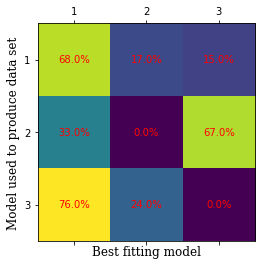

In [43]:
# AIC Confusion matrix 

AIC_matrix = np.zeros((3,3))

AIC_matrix[0,0] = (len(np.where(AIC_winner_datamod1 == 0)[0])/len(AIC_winner_datamod1))*100
AIC_matrix[0,1] = (len(np.where(AIC_winner_datamod1 == 1)[0])/len(AIC_winner_datamod1))*100
AIC_matrix[0,2] = (len(np.where(AIC_winner_datamod1 == 2)[0])/len(AIC_winner_datamod1))*100

AIC_matrix[1,0] = (len(np.where(AIC_winner_datamod2 == 0)[0])/len(AIC_winner_datamod2))*100
AIC_matrix[1,1] = (len(np.where(AIC_winner_datamod2 == 1)[0])/len(AIC_winner_datamod2))*100
AIC_matrix[1,2] = (len(np.where(AIC_winner_datamod2 == 2)[0])/len(AIC_winner_datamod2))*100

AIC_matrix[2,0] = (len(np.where(AIC_winner_datamod3 == 0)[0])/len(AIC_winner_datamod3))*100
AIC_matrix[2,1] = (len(np.where(AIC_winner_datamod3 == 1)[0])/len(AIC_winner_datamod3))*100
AIC_matrix[2,2] = (len(np.where(AIC_winner_datamod3 == 2)[0])/len(AIC_winner_datamod3))*100



fig, ax = plt.subplots()

ax.matshow(AIC_matrix)
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(AIC_matrix[i, j]) + "%",
                       ha="center", va="center", color="r")
ax.set_xticks(np.arange(3),np.array([1,2,3]))
ax.set_yticks(np.arange(3),np.array([1,2,3]))       
plt.xlabel("Best fitting model",fontsize=12,**font)
plt.ylabel("Model used to produce data set",fontsize=12,**font)
plt.show()

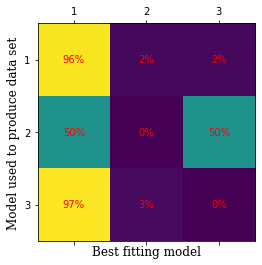

In [44]:
# AIC Confusion matrix 

BIC_matrix = np.zeros((3,3))
BIC_matrix[0,0] = (len(np.where(BIC_winner_datamod1 == 0)[0])/len(BIC_winner_datamod1))*100
BIC_matrix[0,1] = (len(np.where(BIC_winner_datamod1 == 1)[0])/len(BIC_winner_datamod1))*100
BIC_matrix[0,2] = (len(np.where(BIC_winner_datamod1 == 2)[0])/len(BIC_winner_datamod1))*100

BIC_matrix[1,0] = (len(np.where(BIC_winner_datamod2 == 0)[0])/len(BIC_winner_datamod2))*100
BIC_matrix[1,1] = (len(np.where(BIC_winner_datamod2 == 1)[0])/len(BIC_winner_datamod2))*100
BIC_matrix[1,2] = (len(np.where(BIC_winner_datamod2 == 2)[0])/len(BIC_winner_datamod2))*100

BIC_matrix[2,0] = (len(np.where(BIC_winner_datamod3 == 0)[0])/len(BIC_winner_datamod3))*100
BIC_matrix[2,1] = (len(np.where(BIC_winner_datamod3 == 1)[0])/len(BIC_winner_datamod3))*100
BIC_matrix[2,2] = (len(np.where(BIC_winner_datamod3 == 2)[0])/len(BIC_winner_datamod3))*100

fig, ax = plt.subplots()

ax.matshow(BIC_matrix)
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(int(BIC_matrix[i, j])) + "%",
                       ha="center", va="center", color="r")
ax.set_xticks(np.arange(3),np.array([1,2,3]))
ax.set_yticks(np.arange(3),np.array([1,2,3]))  
plt.xlabel("Best fitting model",fontsize=12,**font)
plt.ylabel("Model used to produce data set",fontsize=12,**font)
plt.show()